# 1. Fuentes de información

## 1.0 Importación de liberías

In [3781]:
import pandas as pd
from pathlib import Path

## 1.1 Definicion de rutas absolutas

In [3782]:
BASE_DIR = Path().resolve() 
DATA_DIR = BASE_DIR /"Data"/ "Extraidos"
DURACION_CURSO = DATA_DIR / "duracion_asignatura.csv" 
PLANES_ESTUDIO = DATA_DIR / "plan_estudios.csv"
DOCENTES_MINIMO = DATA_DIR / "docentes_minimos.csv"
DISPONIBILIDAD_DOCENTE = DATA_DIR / "disponibilidad_docentes_simulada.csv"

## 1.2 Lectura de datasets

In [3783]:
df_duracion = pd.read_csv(DURACION_CURSO,sep=";",encoding="utf-8-sig")
df_duracion.head()

,NomAsignatura,DuracionHoras,Ciclo,CodAsignatura
0,ALGORÍTMICA I,5.0,3,202W0301
1,ESTADÍSTICA,5.0,3,202W0302
2,FISICA ELÉCTRONICA,4.0,3,202W0303
3,INGENIERÍA ECONÓMICA,4.0,3,202W0304
4,INTRODUCCIÓN AL DESARROLLO DE SOFTWARE,4.0,3,202W0305


In [3784]:
df_plan = pd.read_csv(PLANES_ESTUDIO,sep=";",encoding="utf-8-sig")
df_plan.head()

,Ciclo,Créditos,CodAsignatura,NomAsignatura,Cod Pre-Requisito,Nom Pre-Requisito
0,1,2.0,INE002,PROGRAMACIÓN Y COMPUTACIÓN,NaN,NaN
1,1,2.0,INE013,EMPRENDIMIENTO E INNOVACIÓN,NaN,NaN
2,1,3.0,INO101,REDACCIÓN Y TÉCNICAS DE COMUNICACIÓN EFECTIVA I,NaN,NaN
3,1,2.0,INO102,MÉTODOS DE ESTUDIO UNIVERSITARIO,NaN,NaN
4,1,2.0,INO103,DESARROLLO PERSONAL Y LIDERAZGO,NaN,NaN


In [3785]:
df_docentes_min = pd.read_csv(DOCENTES_MINIMO,sep=";",encoding="utf-8-sig")
df_docentes_min.head()

,CodAsignatura,NomAsignatura,Matriculados,DuracionHoras,NumGrupos,HorasTotales
0,202W0301,ALGORÍTMICA I,10,5.0,1,5.0
1,202W0302,ESTADÍSTICA,5,5.0,1,5.0
2,202W0303,FISICA ELÉCTRONICA,6,4.0,1,4.0
3,202W0304,INGENIERÍA ECONÓMICA,2,4.0,1,4.0
4,202W0305,INTRODUCCIÓN AL DESARROLLO DE SOFTWARE,4,4.0,1,4.0


In [3786]:
df_disp = pd.read_csv(DISPONIBILIDAD_DOCENTE,sep=",",encoding="utf-8-sig")
df_disp.head()

,CodDocente,CodAsignatura,Día,HoraInicio,HoraFin,DuracionHoras,Ciclo
0,085774,202W0301,LUNES,14:00,19:00,5.0,3
1,0A1609,202W0301,JUEVES,17:00,22:00,5.0,3
2,0A9179,202W0301,LUNES,08:00,13:00,5.0,3
3,007056,202W0302,JUEVES,08:00,13:00,5.0,3
4,043788,202W0302,JUEVES,08:00,13:00,5.0,3


## 1.3 Generación de datasets restantes

In [3787]:
# Eliminar duplicados para quedarte solo con relaciones únicas docente-curso
df_docente_curso = df_disp[["CodDocente", "CodAsignatura"]].drop_duplicates()

# Agrupar por docente si quieres ver todos los cursos que puede dictar
docentes_con_cursos = df_docente_curso.groupby("CodDocente")["CodAsignatura"].apply(list).reset_index()

# Si quieres usarlo como diccionario:
dict_docente_cursos = df_docente_curso.groupby("CodDocente")["CodAsignatura"].apply(set).to_dict()

In [3788]:
dict_docente_cursos

{'007056': {'202W0302'},
 '011797': {'202W0704', '202W0803'},
 '01345428': {'202W0503'},
 '030228': {'202W0502'},
 '043788': {'202W0302', '202W0405'},
 '07240690': {'INE002'},
 '08232375': {'202W0706', '202W0902', '202W0905'},
 '08490635': {'202W0304'},
 '085774': {'202W0301', 'INE002'},
 '091081': {'202W0706'},
 '095699': {'202W0407'},
 '095702': {'202W0607'},
 '09571E': {'202W0305', '202W0504'},
 '095729': {'202W0501'},
 '095753': {'202W0401', '202W0704'},
 '09620253': {'202W0507', '202W0904'},
 '099562': {'202W0904'},
 '099589': {'202W0906'},
 '0A0182': {'202W0901', 'INE002'},
 '0A0259': {'202W0306'},
 '0A0280': {'202W0306'},
 '0A0307': {'202W0705'},
 '0A0314': {'202W0305', '202W0808'},
 '0A06292': {'202W0303'},
 '0A0690': {'202W0701', '202W0703', '202W0905'},
 '0A1236': {'202W0802'},
 '0A1331': {'202W0306'},
 '0A1607': {'202W0901'},
 '0A1609': {'202W0301'},
 '0A1871': {'202W0307', '202W0507', '202W0604'},
 '0A1873': {'202W0901', '202W0903', '202W0905'},
 '0A1874': {'202W0807', '202

In [3789]:
dict_prerrequisitos = {}

for _, fila in df_plan.iterrows():
    curso = fila["CodAsignatura"]
    prereq = fila["Cod Pre-Requisito"]

    if pd.notna(prereq):
        if curso not in dict_prerrequisitos:
            dict_prerrequisitos[curso] = []
        dict_prerrequisitos[curso].append(prereq)


In [3790]:
dict_prerrequisitos

{'INO201': ['INO101'],
 'INO204': ['INO104'],
 '202W0401': ['202W0301'],
 '202W0402': ['202W0307'],
 '202W0403': ['202W0304'],
 '202W0404': ['202W0306'],
 '202W0405': ['202W0302'],
 '202W0406': ['202W0305', '202W0304'],
 '202W0407': ['202W0303'],
 '202W0501': ['202W0401', '202W0405'],
 '202W0502': ['202W0407'],
 '202W0503': ['202W0406'],
 '202W0504': ['202W0404'],
 '202W0505': ['202W0401'],
 '202W0506': ['202W0402'],
 '202W0507': ['202W0406'],
 '202W0601': ['202W0503'],
 '202W0602': ['202W0505'],
 '202W0603': ['202W0507', '202W0505'],
 '202W0604': ['202W0506', '202W0403'],
 '202W0605': ['202W0406'],
 '202W0606': ['202W0504'],
 '202W0607': ['202W0502'],
 '202W0701': ['202W0602', '202W0603', '202W0601'],
 '202W0702': ['202W0602'],
 '202W0703': ['202W0603', '202W0606'],
 '202W0704': ['202W0604'],
 '202W0705': ['202W0606'],
 '202W0706': ['202W0503', '202W0605'],
 '202W0707': ['202W0607'],
 '202W0801': ['202W0707'],
 '202W0802': ['202W0501', '202W0702'],
 '202W0803': ['202W0701', '202W0705'

# 2. Definicion de clases

## 2.0 Constructores de clase

In [3791]:
from dataclasses import dataclass, field
from typing import List, Set, Optional
#from pathlib import Path
#import pandas as pd

# -------- Clases base --------

@dataclass
class Curso:
    codigo: str
    nombre: str
    ciclo: int
    duracion: float  # en horas
    creditos: float
    prerequisitos: List[str]

@dataclass
class Docente:
    codigo: str
    cursos_dictables: Set[str]
    carga: List['Asignacion'] = field(default_factory=list)

    def agregar_asignacion(self, asignacion: 'Asignacion'):
        self.carga.append(asignacion)

    def horas_totales_asignadas(self) -> float:
        return sum(asig.duracion_horas() for asig in self.carga)

@dataclass
class Disponibilidad:
    cod_docente: str
    cod_asignatura: str
    dia: str
    hora_inicio: str
    hora_fin: str
    duracion: float
    ciclo: int

@dataclass
class Seccion:
    cod_asignatura: str
    grupo: int
    matriculados: int
    duracion: float

@dataclass
class Asignacion:
    cod_asignatura: str
    seccion: int
    cod_docente: str
    dia: str
    hora_inicio: str
    hora_fin: str
    ciclo: str

    def duracion_horas(self) -> float:
        h1, m1 = map(int, self.hora_inicio.split(":"))
        h2, m2 = map(int, self.hora_fin.split(":"))
        return (h2 + m2/60) - (h1 + m1/60)
    
    def __repr__(self):
        return f"{self.cod_asignatura}-Ciclo{self.ciclo}-Sec{self.seccion}- Docente {self.cod_docente} - {self.dia}-{self.hora_inicio}-{self.hora_fin}"


# -------- Individuo (horario completo) --------

@dataclass
class Individuo:
    asignaciones: List[Asignacion]

    def __iter__(self):
        return iter(self.asignaciones)

    def get_carga_por_docente(self, cod_docente: str) -> List[Asignacion]:
        return [a for a in self.asignaciones if a.docente.codigo == cod_docente]


## 2.1 Carga de informacion a las clases

In [3792]:
def cargar_cursos(df_duracion: pd.DataFrame, df_plan: pd.DataFrame) -> List[Curso]:
    cursos = []
    for _, row in df_duracion.iterrows():
        codigo = row['CodAsignatura']
        nombre = row['NomAsignatura']
    
        duracion = float(row['DuracionHoras'])
        
        creditos = df_plan[df_plan['CodAsignatura'] == codigo]['Créditos'].values
        creditos = float(creditos[0]) if len(creditos) > 0 else 0
        ciclo = df_plan[df_plan['CodAsignatura'] == codigo]['Ciclo'].values

        prereqs = df_plan[df_plan['CodAsignatura'] == codigo]['Cod Pre-Requisito'].dropna().tolist()

        cursos.append(Curso(codigo, nombre, ciclo, duracion, creditos, prereqs))
    return cursos

def cargar_docentes(dict_docente_cursos: dict) -> List[Docente]:
    return [Docente(codigo=cod, cursos_dictables=set(cursos)) for cod, cursos in dict_docente_cursos.items()]

def cargar_disponibilidades(df_disp: pd.DataFrame) -> List[Disponibilidad]:
    disponibilidades = []
    for _, row in df_disp.iterrows():
        disponibilidades.append(
            Disponibilidad(
                cod_docente=row['CodDocente'],
                cod_asignatura=row['CodAsignatura'],
                dia=row['Día'],
                hora_inicio=row['HoraInicio'],
                hora_fin=row['HoraFin'],
                duracion=float(row['DuracionHoras']),
                ciclo=int(row['Ciclo'])
            )
        )
    return disponibilidades

def cargar_secciones(df_docentes_min: pd.DataFrame) -> List[Seccion]:
    secciones = []
    for _, row in df_docentes_min.iterrows():
        for grupo in range(1, int(row['NumGrupos']) + 1):
            secciones.append(
                Seccion(
                    cod_asignatura=row['CodAsignatura'],
                    grupo=grupo,
                    matriculados=int(row['Matriculados']),
                    duracion=float(row['DuracionHoras'])
                )
            )
    return secciones

# 3. Creación del algoritmo genético

## 3.0 Creación de individuo

In [3793]:
import random
from datetime import datetime, timedelta

# Clase para generar individuos
class GeneradorIndividuo:
    def __init__(self, df_docentes_min, dict_docente_cursos, df_plan):
        self.df_docentes_min = df_docentes_min
        self.dict_docente_cursos = dict_docente_cursos
        self.df_plan=df_plan

    def generar_individuo(self):
        individuo = []

        for _, row in self.df_docentes_min.iterrows():
            cod_asig = row["CodAsignatura"]
            num_grupos = int(row["NumGrupos"])
            duracion = float(row["DuracionHoras"])
            ciclo = df_plan[df_plan['CodAsignatura'] == cod_asig]['Ciclo'].values[0]
            
            # Obtener docentes que puedan dictar ese curso
            posibles_docentes = [doc for doc, cursos in self.dict_docente_cursos.items() if cod_asig in cursos]

            for seccion_num in range(1, num_grupos + 1):
                if not posibles_docentes:
                    continue  # No hay docentes para este curso

                docente = random.choice(posibles_docentes)
                dia = random.choice(["LUNES", "MARTES", "MIÉRCOLES", "JUEVES", "VIERNES", "SÁBADO"])

                # Elegir hora random entre 08:00 y (22:00 - duracion)
                hora_min = datetime.strptime("08:00", "%H:%M")
                hora_max = datetime.strptime("22:00", "%H:%M") - timedelta(hours=duracion)

                # Generar lista de posibles horas (de 1 en 1 hora)
                horas_posibles = []
                hora_actual = hora_min
                while hora_actual <= hora_max:
                    horas_posibles.append(hora_actual)
                    hora_actual += timedelta(hours=1)

                hora_inicio = random.choice(horas_posibles)
                hora_fin = hora_inicio + timedelta(hours=duracion)  

                asignacion = Asignacion(
                    cod_asignatura=cod_asig,
                    ciclo=ciclo,
                    seccion=seccion_num,
                    cod_docente=docente,
                    dia=dia,
                    hora_inicio=hora_inicio.strftime("%H:%M"),
                    hora_fin=hora_fin.strftime("%H:%M")
                )

                individuo.append(asignacion)

        return individuo


In [3794]:
generador = GeneradorIndividuo(df_docentes_min, dict_docente_cursos, df_plan)
individuo = generador.generar_individuo()

for a in individuo:
    print(a)

202W0301-Ciclo3-Sec1- Docente 0A1609 - SÁBADO-17:00-22:00
202W0302-Ciclo3-Sec1- Docente 043788 - JUEVES-15:00-20:00
202W0303-Ciclo3-Sec1- Docente 0A06292 - MIÉRCOLES-12:00-16:00
202W0304-Ciclo3-Sec1- Docente 08490635 - LUNES-17:00-21:00
202W0305-Ciclo3-Sec1- Docente 09571E - LUNES-10:00-14:00
202W0306-Ciclo3-Sec1- Docente 0A0259 - MARTES-14:00-19:00
202W0307-Ciclo3-Sec1- Docente 0A1871 - VIERNES-18:00-22:00
202W0401-Ciclo4-Sec1- Docente 095753 - JUEVES-13:00-18:00
202W0402-Ciclo4-Sec1- Docente 41388541 - VIERNES-09:00-13:00
202W0403-Ciclo4-Sec1- Docente 0A4524 - VIERNES-15:00-19:00
202W0404-Ciclo4-Sec1- Docente 0A5230 - JUEVES-12:00-16:00
202W0405-Ciclo4-Sec1- Docente 043788 - MARTES-15:00-19:00
202W0407-Ciclo4-Sec1- Docente 095699 - MIÉRCOLES-12:00-17:00
202W0501-Ciclo5-Sec1- Docente 095729 - LUNES-14:00-18:00
202W0502-Ciclo5-Sec1- Docente 10089409 - VIERNES-15:00-19:00
202W0503-Ciclo5-Sec1- Docente 01345428 - VIERNES-09:00-13:00
202W0504-Ciclo5-Sec1- Docente Z000016 - MIÉRCOLES-15:00

## 3.1 Calcular Fitness

### constrain_cursos_mismo_ciclo_no_solapados

In [3795]:
from collections import defaultdict
from datetime import datetime

In [3796]:
def se_solapan(inicio1, fin1, inicio2, fin2):
    fmt = "%H:%M"
    i1 = datetime.strptime(inicio1, fmt)
    f1 = datetime.strptime(fin1, fmt)
    i2 = datetime.strptime(inicio2, fmt)
    f2 = datetime.strptime(fin2, fmt)
    return max(i1, i2) < min(f1, f2)


In [ ]:
# penalidad por cada curso que genere solape
def constrain_cursos_mismo_ciclo_no_solapados(individuo):

    penalidad = 0
    detalles = []

    # Agrupar asignaciones por ciclo
    asignaciones_por_ciclo = defaultdict(list)
    for asignacion in individuo:
        asignaciones_por_ciclo[asignacion.ciclo].append(asignacion)
    
    for ciclo, asignaciones in asignaciones_por_ciclo.items():
        # Verificar solapes dentro del mismo ciclo
        for i in range(len(asignaciones)):
            for j in range(i + 1, len(asignaciones)):
                a1 = asignaciones[i]
                a2 = asignaciones[j]

                # Si están en el mismo día y se cruzan en horario
                if a1.dia == a2.dia and se_solapan(a1.hora_inicio, a1.hora_fin, a2.hora_inicio, a2.hora_fin):
                    penalidad += 1
                    detalles.append(
                        f"Solapamiento en ciclo {ciclo}: {a1.cod_asignatura}-Sec{a1.seccion} y {a2.cod_asignatura}-Sec{a2.seccion} el {a1.dia} entre {a1.hora_inicio}-{a1.hora_fin} y {a2.hora_inicio}-{a2.hora_fin}"
                    )

    return penalidad, detalles

### constrain_cumplir_totalidad_horas

In [3798]:

# penalidades por diferencias entre horas dictadas y horas requeridas
def constrain_cumplir_totalidad_horas(individuo):
    # clave: (cod_asignatura, seccion), valor: suma de horas
    horas_asignadas = defaultdict(float)

    for asignacion in individuo:
        clave = (asignacion.cod_asignatura, asignacion.seccion)
        duracion = asignacion.duracion_horas()
        horas_asignadas[clave] += duracion
        
    penalidad = 0
    detalles = []

    for clave, horas_dictadas in horas_asignadas.items():
        cod_asig, seccion = clave

        fila = df_duracion[df_duracion['CodAsignatura'] == cod_asig]
        if not fila.empty:
            horas_requeridas = float(fila['DuracionHoras'].values[0])
        else:
            # Si no se encuentra el curso en df_duracion, lo penalizamos
            penalidad += 1
            detalles.append(f"{cod_asig} no encontrado en df_duracion")
            continue

        if horas_dictadas != horas_requeridas:
            diferencia = abs(horas_dictadas - horas_requeridas)
            penalidad += diferencia  # penalización proporcional a la diferencia
            detalles.append(f"{cod_asig}-Sec{seccion}: {horas_dictadas}h vs {horas_requeridas}h requeridas")

    return penalidad, detalles


### constrain_franjas_validas

In [3799]:
# penalidad por cada curso que este fuera del rango
def constrain_franjas_validas(individuo):
    penalidad = 0
    detalles = []

    hora_minima = 8 * 60     # 08:00 → minutos
    hora_maxima = 22 * 60    # 22:00 → minutos

    for asignacion in individuo:
        # Convertimos hora_inicio y hora_fin a minutos
        h_ini, m_ini = map(int, asignacion.hora_inicio.split(":"))
        h_fin, m_fin = map(int, asignacion.hora_fin.split(":"))
        inicio = h_ini * 60 + m_ini
        fin = h_fin * 60 + m_fin

        # Verificar si está fuera del rango
        if inicio < hora_minima or fin > hora_maxima:
            penalidad += 1
            detalles += f"[{asignacion}] fuera de rango permitido"

    return penalidad, detalles


### constrain_docente_max4_cursos

In [3800]:
# 1 punto de penalidad por cada curso de exceso
def constrain_docente_max4_cursos(individuo):
    penalidad = 0
    detalles = []

    # Mapeo: cod_docente → conjunto de cod_asignatura únicos
    cursos_por_docente = defaultdict(set)

    for asignacion in individuo:
        cursos_por_docente[asignacion.cod_docente].add(asignacion.cod_asignatura)

    for cod_docente, cursos in cursos_por_docente.items():
        cantidad_cursos = len(cursos)
        if cantidad_cursos > 4:
            exceso = cantidad_cursos - 4
            penalidad += exceso
            detalles.append(f"Docente {cod_docente} tiene {cantidad_cursos} cursos asignados (máx 4)")

    return penalidad, detalles


### constrain_minimo_docentes_por_curso

In [3801]:
# 1 punto de penalidad por cada curso no encontrado y puntos de penalidad 
# adicionales por la diferencia entre aulas reales - aulas requeridas
def constrain_minimo_docentes_por_curso(individuo):
    penalidad = 0
    detalles = []

    # Mapeo: cod_asignatura → conjunto de cod_docente
    docentes_por_curso = defaultdict(set)

    for asignacion in individuo:
        docentes_por_curso[asignacion.cod_asignatura].add(asignacion.cod_docente)

    for cod_asignatura, docentes in docentes_por_curso.items():
        fila = df_docentes_min[df_docentes_min['CodAsignatura'] == cod_asignatura]
        if not fila.empty:
            minimo_requerido = int(fila['NumGrupos'].values[0])
        else:
            # Si no se encuentra el curso en el DataFrame, lo penalizamos
            penalidad += 1
            detalles.append(f"{cod_asignatura} no encontrado en df_docentes_min")
            continue

        cantidad_asignada = len(docentes)
        if cantidad_asignada < minimo_requerido:
            diferencia = minimo_requerido - cantidad_asignada
            penalidad += diferencia
            detalles.append(f"{cod_asignatura} tiene {cantidad_asignada} docentes, requiere mínimo {minimo_requerido}")

    return penalidad, detalles


### constrain_ciclos_bajos_horario_preferido

In [3802]:
from datetime import datetime

def constrain_ciclos_bajos_horario_preferido(individuo):
    penalizacion = 0
    detalles_penalizacion = []

    ciclos_bajos = {1, 2, 3, 4, 5}
    hora_almuerzo_inicio = datetime.strptime("13:00", "%H:%M")
    hora_almuerzo_fin = datetime.strptime("14:00", "%H:%M")
    hora_limite = datetime.strptime("18:00", "%H:%M")

    for asignacion in individuo:
        if asignacion.ciclo in ciclos_bajos:
            hora_inicio_dt = datetime.strptime(asignacion.hora_inicio, "%H:%M")

            if hora_almuerzo_inicio <= hora_inicio_dt < hora_almuerzo_fin:
                penalizacion += 1
                detalles_penalizacion.append({
                    "Motivo": "Clase en hora de almuerzo",
                    "CodAsignatura": asignacion.cod_asignatura,
                    "Ciclo": asignacion.ciclo,
                    "HoraInicio": asignacion.hora_inicio,
                    "CodDocente": asignacion.cod_docente,
                    "Día": asignacion.dia
                })

            elif hora_inicio_dt >= hora_limite:
                penalizacion += 1
                detalles_penalizacion.append({
                    "Motivo": "Clase después de las 6pm",
                    "CodAsignatura": asignacion.cod_asignatura,
                    "Ciclo": asignacion.ciclo,
                    "HoraInicio": asignacion.hora_inicio,
                    "CodDocente": asignacion.cod_docente,
                    "Día": asignacion.dia
                })

    return penalizacion, detalles_penalizacion


### constrain_preferencias_docente

In [3803]:
def constrain_preferencias_docente(individuo):
    penalizacion = 0
    detalles = []

    # Construimos el diccionario de disponibilidad a partir del DataFrame global
    disponibilidad_dict = {}
    for _, row in df_disp.iterrows():
        cod = row["CodDocente"]
        dia = row["Día"]
        h_ini = row["HoraInicio"]
        h_fin = row["HoraFin"]

        if cod not in disponibilidad_dict:
            disponibilidad_dict[cod] = {}

        if dia not in disponibilidad_dict[cod]:
            disponibilidad_dict[cod][dia] = []

        disponibilidad_dict[cod][dia].append((h_ini, h_fin))

    for asignacion in individuo:
        cod_docente = asignacion.cod_docente
        dia = asignacion.dia
        h_ini = asignacion.hora_inicio
        h_fin = asignacion.hora_fin

        disponible = False
        if cod_docente in disponibilidad_dict and dia in disponibilidad_dict[cod_docente]:
            for rango in disponibilidad_dict[cod_docente][dia]:
                if h_ini >= rango[0] and h_fin <= rango[1]:
                    disponible = True
                    break

        if not disponible:
            penalizacion += 1
            detalles.append(f"{cod_docente} fuera de preferencia en {dia} de {h_ini} a {h_fin}")

    return penalizacion, detalles


### constrain_3_franjas_mismo_dia

In [3804]:
from collections import defaultdict

def constrain_3_franjas_mismo_dia(individuo):
    penalizacion = 0
    detalles = []

    # Diccionario: (ciclo, día) → contador de franjas
    franjas_por_dia = defaultdict(int)

    for asignacion in individuo:
        clave = (asignacion.ciclo, asignacion.dia)
        franjas_por_dia[clave] += 1

    for (ciclo, dia), cantidad in franjas_por_dia.items():
        if cantidad > 2:
            exceso = cantidad - 2
            penalizacion += exceso
            detalles.append(f"Ciclo {ciclo} tiene {cantidad} cursos el {dia}")

    return penalizacion, detalles


### constrain_espacios_mayores_3h_docente

In [3805]:
from collections import defaultdict
from datetime import datetime

def constrain_espacios_mayores_3h_docente(individuo):
    penalizacion = 0
    detalles = []

    # Diccionario: (docente, día) → lista de horas de clases
    sesiones_por_docente_dia = defaultdict(list)

    for asignacion in individuo:
        hora_inicio = datetime.strptime(asignacion.hora_inicio, "%H:%M")
        hora_fin = datetime.strptime(asignacion.hora_fin, "%H:%M")
        sesiones_por_docente_dia[(asignacion.cod_docente, asignacion.dia)].append((hora_inicio, hora_fin))

    for (docente, dia), sesiones in sesiones_por_docente_dia.items():
        # Ordenar las sesiones por hora de inicio
        sesiones.sort()
        for i in range(len(sesiones) - 1):
            fin_actual = sesiones[i][1]
            inicio_siguiente = sesiones[i + 1][0]
            espacio = (inicio_siguiente - fin_actual).total_seconds() / 3600

            if espacio > 3:
                penalizacion += 1
                detalles.append(f"{docente} tiene espacio de {espacio:.1f}h el {dia}")

    return penalizacion, detalles


### constrain_espacios_mayores_3h_ciclo

In [3806]:
from collections import defaultdict
from datetime import datetime

def constrain_espacios_mayores_3h_ciclo(individuo):
    penalizacion = 0
    detalles = []

    # Diccionario: (ciclo, día) → lista de horas de clases
    sesiones_por_ciclo_dia = defaultdict(list)

    for asignacion in individuo:
        hora_inicio = datetime.strptime(asignacion.hora_inicio, "%H:%M")
        hora_fin = datetime.strptime(asignacion.hora_fin, "%H:%M")
        sesiones_por_ciclo_dia[(asignacion.ciclo, asignacion.dia)].append((hora_inicio, hora_fin))

    for (ciclo, dia), sesiones in sesiones_por_ciclo_dia.items():
        sesiones.sort()
        for i in range(len(sesiones) - 1):
            fin_actual = sesiones[i][1]
            inicio_siguiente = sesiones[i + 1][0]
            espacio = (inicio_siguiente - fin_actual).total_seconds() / 3600

            if espacio > 3:
                penalizacion += 1
                detalles.append(f"Ciclo {ciclo} tiene espacio de {espacio:.1f}h el {dia}")

    return penalizacion, detalles


### constrain_prereq_vs_otros_ciclos

In [3807]:
from datetime import datetime

# Mapa para ordenar los días de la semana
ORDEN_DIAS = {
    "LUNES": 0, "MARTES": 1, "MIÉRCOLES": 2, "JUEVES": 3,
    "VIERNES": 4, "SÁBADO": 5
}

def constrain_prereq_vs_otros_ciclos(individuo):
    penalizacion = 0
    detalles = []

    # Agrupar asignaciones por curso
    sesiones_por_curso = {}
    
    for asignacion in individuo:
        if asignacion.cod_asignatura not in sesiones_por_curso:
            sesiones_por_curso[asignacion.cod_asignatura] = []
        sesiones_por_curso[asignacion.cod_asignatura].append(asignacion)

    for curso, prereqs in dict_prerrequisitos.items():
        if curso not in sesiones_por_curso:
            continue  # No se programó el curso
        for prereq in prereqs:
            if prereq not in sesiones_por_curso:
                continue  # No se programó el prerrequisito

            # Obtener la sesión más temprana de prereq y la más temprana del curso
            min_inicio_prereq = min(
                (ORDEN_DIAS[a.dia], datetime.strptime(a.hora_inicio, "%H:%M")) 
                for a in sesiones_por_curso[prereq]
            )

            min_inicio_curso = min(
                (ORDEN_DIAS[a.dia], datetime.strptime(a.hora_inicio, "%H:%M")) 
                for a in sesiones_por_curso[curso]
            )

            if min_inicio_prereq > min_inicio_curso:
                penalizacion += 1
                detalles.append(
                    f"Curso {curso} se dicta antes que su prerrequisito {prereq}"
                )

    return penalizacion, detalles


### Ejecución del fitness

In [3808]:
def calcular_fitness(individuo):
    penalidad_total = 0
    detalles_penalidades = []
    penalidad_por_constrain = []

    # Cada función evalúa un constraint y devuelve un número (penalidad) y descripción
    for funcion, nombre_constraint, peso in [
        (constrain_cursos_mismo_ciclo_no_solapados, "Cursos del mismo ciclo no deben compartir franja", 6),
        (constrain_cumplir_totalidad_horas, "Cursos deben cumplir totalidad de horas", 6),
        (constrain_franjas_validas, "Cursos deben estar entre 8am-1pm y 2pm-10pm", 6),
        (constrain_docente_max4_cursos, "Docente dicta máximo 4 cursos", 5),
        (constrain_minimo_docentes_por_curso, "Cantidad mínima de docentes por curso", 5),

        #(constrain_docentes_limite_horas, "Docente no pasa su límite de horas lectivas", 5),
        #(constrain_docente_para_todas_secciones, "Asignar docentes a todas las secciones", 5),

        (constrain_ciclos_bajos_horario_preferido, "Cursos 1-5 ciclo preferencia horario", 4),
        (constrain_preferencias_docente, "Preferencias horarias del docente", 3),
        (constrain_3_franjas_mismo_dia, "Evitar 3 franjas distintas mismo día (mismo ciclo)", 3),
        (constrain_espacios_mayores_3h_docente, "Evitar huecos >3h en un mismo día (docente)", 3),
        (constrain_espacios_mayores_3h_ciclo, "Evitar huecos >3h en un mismo día (ciclo)", 3),
        (constrain_prereq_vs_otros_ciclos, "Evitar solapes de no-prereqs entre ciclos cercanos", 2)#,
        #(constrain_dias_lunes_viernes, "Preferencia lunes a viernes", 1),
    ]:
        penalidad, descripcion = funcion(individuo)
        penalidad_ponderada = penalidad * peso
        penalidad_por_constrain.append({"nombre_constraint": nombre_constraint, "penalidad":penalidad_ponderada})
        penalidad_total += penalidad_ponderada
        detalles_penalidades.append((nombre_constraint, penalidad, peso, penalidad_ponderada, descripcion))

    return penalidad_total, detalles_penalidades,penalidad_por_constrain


In [3809]:
penalidad,detalles_penalidad,penalidad_por_constrain = calcular_fitness(individuo)

In [3810]:
test=calcular_fitness(individuo)

In [3811]:
penalidad

562

In [3812]:
detalles_penalidad

[('Cursos del mismo ciclo no deben compartir franja',
  32,
  6,
  192,
  ['Solapamiento en ciclo 4: 202W0401-Sec1 y 202W0404-Sec1 el JUEVES entre 13:00-18:00 y 12:00-16:00',
   'Solapamiento en ciclo 5: 202W0501-Sec1 y 202W0507-Sec1 el LUNES entre 14:00-18:00 y 16:00-21:00',
   'Solapamiento en ciclo 5: 202W0502-Sec1 y 202W0506-Sec1 el VIERNES entre 15:00-19:00 y 15:00-19:00',
   'Solapamiento en ciclo 6: 202W0601-Sec1 y 202W0602-Sec1 el MARTES entre 16:00-20:00 y 17:00-22:00',
   'Solapamiento en ciclo 6: 202W0603-Sec1 y 202W0605-Sec1 el VIERNES entre 10:00-15:00 y 13:00-18:00',
   'Solapamiento en ciclo 6: 202W0603-Sec1 y 202W0606-Sec1 el VIERNES entre 10:00-15:00 y 10:00-14:00',
   'Solapamiento en ciclo 6: 202W0605-Sec1 y 202W0606-Sec1 el VIERNES entre 13:00-18:00 y 10:00-14:00',
   'Solapamiento en ciclo 7: 202W0701-Sec1 y 202W0702-Sec1 el MIÉRCOLES entre 10:00-15:00 y 11:00-16:00',
   'Solapamiento en ciclo 7: 202W0701-Sec1 y 202W0706-Sec1 el MIÉRCOLES entre 10:00-15:00 y 14:00-

In [3813]:
penalidad_por_constrain

[{'nombre_constraint': 'Cursos del mismo ciclo no deben compartir franja',
  'penalidad': 192},
 {'nombre_constraint': 'Cursos deben cumplir totalidad de horas',
  'penalidad': 0},
 {'nombre_constraint': 'Cursos deben estar entre 8am-1pm y 2pm-10pm',
  'penalidad': 0},
 {'nombre_constraint': 'Docente dicta máximo 4 cursos', 'penalidad': 0},
 {'nombre_constraint': 'Cantidad mínima de docentes por curso',
  'penalidad': 35},
 {'nombre_constraint': 'Cursos 1-5 ciclo preferencia horario', 'penalidad': 8},
 {'nombre_constraint': 'Preferencias horarias del docente', 'penalidad': 225},
 {'nombre_constraint': 'Evitar 3 franjas distintas mismo día (mismo ciclo)',
  'penalidad': 42},
 {'nombre_constraint': 'Evitar huecos >3h en un mismo día (docente)',
  'penalidad': 0},
 {'nombre_constraint': 'Evitar huecos >3h en un mismo día (ciclo)',
  'penalidad': 0},
 {'nombre_constraint': 'Evitar solapes de no-prereqs entre ciclos cercanos',
  'penalidad': 60}]

## 3.2 Cruce

### Cruce

In [3814]:
def cruce_inteligente(poblacion, tamaño_torneo=5, prob_cruce=0.9):
    nueva_poblacion = []

    while len(nueva_poblacion) < len(poblacion):
        # Selección por torneo
        torneo1 = random.sample(poblacion, tamaño_torneo)
        torneo2 = random.sample(poblacion, tamaño_torneo)

        padre1 = min(torneo1, key=lambda ind: calcular_fitness(ind)[0])
        padre2 = min(torneo2, key=lambda ind: calcular_fitness(ind)[0])

        if random.random() < prob_cruce:
            penalidades1 = calcular_fitness(padre1)[2]  # penalidad_por_constrain
            penalidades2 = calcular_fitness(padre2)[2]

            hijo = []
            for i in range(len(padre1)):
                penal1 = penalidades1.get(i, 0)
                penal2 = penalidades2.get(i, 0)

                if penal1 == 0 and penal2 == 0:
                    # Ambos son válidos, elegir aleatorio
                    hijo.append(random.choice([padre1[i], padre2[i]]))
                elif penal1 == 0:
                    hijo.append(padre1[i])
                elif penal2 == 0:
                    hijo.append(padre2[i])
                else:
                    # Ambos están mal, elegir el menos malo
                    hijo.append(padre1[i] if penal1 < penal2 else padre2[i])
            nueva_poblacion.append(hijo)
        else:
            nueva_poblacion.extend([padre1.copy(), padre2.copy()])

    return nueva_poblacion[:len(poblacion)]


## 3.3 Mutación

### Mutación

In [3815]:
import random
import copy

DIAS_VALIDOS = ['LUNES', 'MARTES', 'MIÉRCOLES', 'JUEVES', 'VIERNES', 'SÁBADO']

def mutar_individuo_por_penalidad(individuo, penalidad, dia=None, penalidad_max=1000):
    """
    Aplica mutación más intensa en individuos con más penalidad.
    Cambia el día de una o más sesiones del individuo.

    Args:
        individuo: lista de sesiones (cada una es un objeto Asignacion)
        penalidad: penalidad del individuo
        dia: día al que se quiere mutar (si None, se elige al azar distinto del actual)
        penalidad_max: penalidad más alta posible (para escalar la probabilidad)

    Return:
        nuevo_individuo: individuo mutado
    """
    nuevo_individuo = [copy.deepcopy(sesion) for sesion in individuo]

    # Escalar la probabilidad: más penalidad → más chance de mutar
    prob_mutacion = min(1.0, penalidad / penalidad_max)  # Normalizar entre 0 y 1

    for sesion in nuevo_individuo:
        if random.random() < prob_mutacion:
            dia_actual = sesion.dia

            if dia:
                nuevo_dia = dia
            else:
                dias_disponibles = [d for d in DIAS_VALIDOS if d != dia_actual]
                nuevo_dia = random.choice(dias_disponibles)

            sesion.dia = nuevo_dia

    return nuevo_individuo


## 4.3 Correr algoritmo genetico

In [3816]:
import matplotlib.pyplot as plt

def run_algoritmo_genetico(
    tam_poblacion=30,
    generaciones=100,
    porcentaje_elite=0.1,
    verbose=True
):
    penalidades_totales = []
    historial_penalidad = []

    # 1. Inicialización
    poblacion = [generador.generar_individuo() for _ in range(tam_poblacion)]
    poblacion_fitness = [(ind, *calcular_fitness(ind)) for ind in poblacion]

    for gen in range(generaciones):
        # Ordenar por penalidad (fitness más bajo = mejor)
        poblacion_fitness.sort(key=lambda x: x[2])
        elite_count = int(porcentaje_elite * tam_poblacion)
        elite = [x[0] for x in poblacion_fitness[:elite_count]]

        # Obtener individuos para cruce (solo genotipos)
        poblacion_actual = [x[0] for x in poblacion_fitness]

        # Aplicar cruce por torneo con población completa
        hijos = cruce_por_torneo(poblacion_actual)

        # Aplicar mutación a los hijos
        hijos_mutados = []
        for hijo in hijos:
            penalidad,_,_ = calcular_fitness(hijo)
            hijo_mutado = mutar_individuo_por_penalidad(hijo, penalidad)
            hijos_mutados.append(hijo_mutado)

        # Armar nueva población (elite + hijos mutados)
        nueva_poblacion = elite + hijos_mutados[:tam_poblacion - elite_count]

        # Evaluar nueva población
        poblacion_fitness = [(ind, *calcular_fitness(ind)) for ind in nueva_poblacion]

        # Ordenar por penalidad total (p[1]) y extraer p[2]

        # Mejor individuo de la generación
        mejor_individuo_fitness = min(poblacion_fitness, key=lambda p: p[1])
        mejor_penalidad = mejor_individuo_fitness[1]
        h_pemalidades = mejor_individuo_fitness[3]

        penalidades_totales.append(mejor_penalidad)
        historial_penalidad.append(h_pemalidades)

        if verbose:
            print(f"Generación {gen + 1}: Mejor penalidad = {mejor_penalidad}")

        # Obtener mejor individuo
        mejor_individuo = min(poblacion_fitness, key=lambda x: x[2])

    return mejor_individuo, historial_penalidad, penalidades_totales


In [3817]:
mejor_individuo, historial, mejores_penalidades = run_algoritmo_genetico(
    tam_poblacion=60,
    generaciones=300,
    porcentaje_elite=0.3
)


Generación 1: Mejor penalidad = 494
Generación 2: Mejor penalidad = 484
Generación 3: Mejor penalidad = 484
Generación 4: Mejor penalidad = 473
Generación 5: Mejor penalidad = 473
Generación 6: Mejor penalidad = 468
Generación 7: Mejor penalidad = 468
Generación 8: Mejor penalidad = 468
Generación 9: Mejor penalidad = 468
Generación 10: Mejor penalidad = 456
Generación 11: Mejor penalidad = 456
Generación 12: Mejor penalidad = 456
Generación 13: Mejor penalidad = 439
Generación 14: Mejor penalidad = 439
Generación 15: Mejor penalidad = 439
Generación 16: Mejor penalidad = 439
Generación 17: Mejor penalidad = 439
Generación 18: Mejor penalidad = 439
Generación 19: Mejor penalidad = 439
Generación 20: Mejor penalidad = 439
Generación 21: Mejor penalidad = 439
Generación 22: Mejor penalidad = 439
Generación 23: Mejor penalidad = 439
Generación 24: Mejor penalidad = 437
Generación 25: Mejor penalidad = 437
Generación 26: Mejor penalidad = 437
Generación 27: Mejor penalidad = 437
Generación

In [3818]:
historial

[[{'nombre_constraint': 'Cursos del mismo ciclo no deben compartir franja',
   'penalidad': 132},
  {'nombre_constraint': 'Cursos deben cumplir totalidad de horas',
   'penalidad': 0},
  {'nombre_constraint': 'Cursos deben estar entre 8am-1pm y 2pm-10pm',
   'penalidad': 0},
  {'nombre_constraint': 'Docente dicta máximo 4 cursos', 'penalidad': 0},
  {'nombre_constraint': 'Cantidad mínima de docentes por curso',
   'penalidad': 25},
  {'nombre_constraint': 'Cursos 1-5 ciclo preferencia horario',
   'penalidad': 12},
  {'nombre_constraint': 'Preferencias horarias del docente', 'penalidad': 228},
  {'nombre_constraint': 'Evitar 3 franjas distintas mismo día (mismo ciclo)',
   'penalidad': 36},
  {'nombre_constraint': 'Evitar huecos >3h en un mismo día (docente)',
   'penalidad': 0},
  {'nombre_constraint': 'Evitar huecos >3h en un mismo día (ciclo)',
   'penalidad': 3},
  {'nombre_constraint': 'Evitar solapes de no-prereqs entre ciclos cercanos',
   'penalidad': 58}],
 [{'nombre_constrain

In [3819]:
# Transformar historial a una lista de diccionarios por generación
historial_dicts = [
    {item['nombre_constraint']: item['penalidad'] for item in generacion}
    for generacion in historial
]


In [3820]:
historial_dicts

[{'Cursos del mismo ciclo no deben compartir franja': 132,
  'Cursos deben cumplir totalidad de horas': 0,
  'Cursos deben estar entre 8am-1pm y 2pm-10pm': 0,
  'Docente dicta máximo 4 cursos': 0,
  'Cantidad mínima de docentes por curso': 25,
  'Cursos 1-5 ciclo preferencia horario': 12,
  'Preferencias horarias del docente': 228,
  'Evitar 3 franjas distintas mismo día (mismo ciclo)': 36,
  'Evitar huecos >3h en un mismo día (docente)': 0,
  'Evitar huecos >3h en un mismo día (ciclo)': 3,
  'Evitar solapes de no-prereqs entre ciclos cercanos': 58},
 {'Cursos del mismo ciclo no deben compartir franja': 126,
  'Cursos deben cumplir totalidad de horas': 0,
  'Cursos deben estar entre 8am-1pm y 2pm-10pm': 0,
  'Docente dicta máximo 4 cursos': 0,
  'Cantidad mínima de docentes por curso': 45,
  'Cursos 1-5 ciclo preferencia horario': 4,
  'Preferencias horarias del docente': 216,
  'Evitar 3 franjas distintas mismo día (mismo ciclo)': 36,
  'Evitar huecos >3h en un mismo día (docente)': 0

In [3821]:
mejor_individuo[0]

[202W0301-Ciclo3-Sec1- Docente 0A9179 - LUNES-09:00-14:00,
 202W0302-Ciclo3-Sec1- Docente 043788 - VIERNES-12:00-17:00,
 202W0303-Ciclo3-Sec1- Docente 0A7583 - LUNES-15:00-19:00,
 202W0304-Ciclo3-Sec1- Docente 08490635 - SÁBADO-17:00-21:00,
 202W0305-Ciclo3-Sec1- Docente 09571E - VIERNES-18:00-22:00,
 202W0306-Ciclo3-Sec1- Docente 0A0259 - MIÉRCOLES-14:00-19:00,
 202W0307-Ciclo3-Sec1- Docente 0A1871 - MARTES-13:00-17:00,
 202W0401-Ciclo4-Sec1- Docente 095753 - SÁBADO-08:00-13:00,
 202W0402-Ciclo4-Sec1- Docente 41388541 - LUNES-11:00-15:00,
 202W0403-Ciclo4-Sec1- Docente 0A4524 - MIÉRCOLES-16:00-20:00,
 202W0404-Ciclo4-Sec1- Docente 0A5230 - SÁBADO-14:00-18:00,
 202W0405-Ciclo4-Sec1- Docente 043788 - VIERNES-10:00-14:00,
 202W0407-Ciclo4-Sec1- Docente 095699 - MARTES-12:00-17:00,
 202W0501-Ciclo5-Sec1- Docente 095729 - MIÉRCOLES-11:00-15:00,
 202W0502-Ciclo5-Sec1- Docente 10089409 - MIÉRCOLES-14:00-18:00,
 202W0503-Ciclo5-Sec1- Docente 01345428 - LUNES-18:00-22:00,
 202W0504-Ciclo5-Sec1

In [3822]:
import matplotlib.pyplot as plt

def graficar_penalidades_por_constraint(historial_penalidad):
    claves = historial_penalidad[0].keys()
    penalidades_por_constraint = {clave: [] for clave in claves}

    for generacion in historial_penalidad:
        for clave in claves:
            penalidades_por_constraint[clave].append(generacion.get(clave, 0))

    plt.figure(figsize=(12, 6))
    for clave, valores in penalidades_por_constraint.items():
        plt.plot(valores, label=clave)

    plt.xlabel("Generación")
    plt.ylabel("Penalidad")
    plt.title("Evolución de penalidades por constraint")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


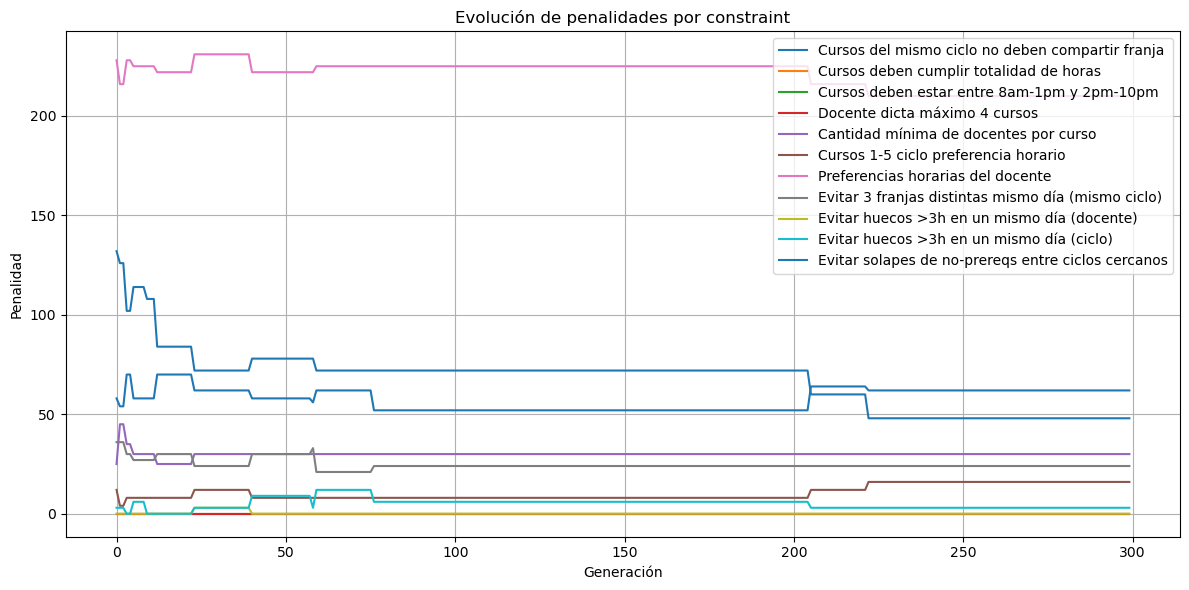

In [3823]:
graficar_penalidades_por_constraint(historial_dicts)

# 5. Algoritmo Tabu

In [3824]:
from copy import deepcopy
from typing import Tuple
import random

In [3825]:
def hay_solapamiento(a1: Asignacion, a2: Asignacion) -> bool:
    h1_ini = int(a1.hora_inicio.replace(":", ""))
    h1_fin = int(a1.hora_fin.replace(":", ""))
    h2_ini = int(a2.hora_inicio.replace(":", ""))
    h2_fin = int(a2.hora_fin.replace(":", ""))
    return not (h1_fin <= h2_ini or h2_fin <= h1_ini)

def mover_franja_no_solapada(asignacion: Asignacion) -> Tuple[str, str]:
    # Intenta mover 1 hora más tarde o antes dentro del rango válido (8:00-22:00)
    h, m = map(int, asignacion.hora_inicio.split(":"))
    nueva_h = h + 1
    if nueva_h + asignacion.duracion_horas() <= 22:
        nueva_inicio = f"{nueva_h:02d}:{m:02d}"
        nueva_fin = f"{int(nueva_h + asignacion.duracion_horas()):02d}:{m:02d}"
        return nueva_inicio, nueva_fin
    return None

def detectar_cursos_con_pocas_secciones(individuo: Individuo) -> List[str]:
    conteo = {}
    for a in individuo.asignaciones:
        conteo.setdefault(a.cod_asignatura, set()).add(a.seccion)

    cursos_faltantes = []
    for curso, secciones in conteo.items():
        fila = df_docentes_min[df_docentes_min["CodAsignatura"] == curso]
        if not fila.empty:
            min_secciones = int(fila["NumGrupos"].values[0])
            if len(secciones) < min_secciones:
                cursos_faltantes.append(curso)
    return cursos_faltantes

def generar_asignacion_valida(cod_asignatura: str) -> Asignacion:
    # Genera una nueva asignación simple con datos al azar
    seccion = random.randint(1, 5)
    docente = random.choice(df_disp[cod_asignatura])
    dia = random.choice(["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES"])
    hora_inicio = f"{random.randint(8, 20):02d}:00"
    duracion = df_docentes_min[cod_asignatura]
    hora_fin = f"{int(hora_inicio.split(':')[0]) + duracion:02d}:00"
    ciclo = df_docentes_min[cod_asignatura]
    return Asignacion(cod_asignatura, seccion, docente, dia, hora_inicio, hora_fin, ciclo)


In [3826]:
def generar_vecinos(individuo: Individuo) -> List[Individuo]:
    vecinos = []

    # 1. Resolver solapamientos
    for i, a1 in enumerate(individuo.asignaciones):
        for j, a2 in enumerate(individuo.asignaciones):
            if i >= j:
                continue
            if a1.ciclo == a2.ciclo and a1.dia == a2.dia:
                if hay_solapamiento(a1, a2):
                    nuevo = deepcopy(individuo)
                    nueva_hora = mover_franja_no_solapada(a1)
                    if nueva_hora:
                        nuevo.asignaciones[i].hora_inicio, nuevo.asignaciones[i].hora_fin = nueva_hora
                        vecinos.append(nuevo)

    # 2. Aumentar secciones si faltan (simplificado)
    cursos_con_falta = detectar_cursos_con_pocas_secciones(individuo)
    for cod_asignatura in cursos_con_falta:
        nuevo = deepcopy(individuo)
        nueva_asignacion = generar_asignacion_valida(cod_asignatura)
        if nueva_asignacion:
            nuevo.asignaciones.append(nueva_asignacion)
            vecinos.append(nuevo)

    return vecinos


In [3827]:
def algoritmo_tabu_solapamientos_y_minsecciones(
    individuo_inicial: Individuo,
    calcular_fitness,
    max_iter: int = 100,
    tabu_tam: int = 20
) -> Tuple[Individuo, List[float]]:
    
    actual = deepcopy(individuo_inicial)
    mejor = deepcopy(individuo_inicial)
    tabu_lista = []
    historial_penalidades = []

    mejor_penalidad, _, _ = calcular_fitness(mejor)
    
    for iteracion in range(max_iter):
        vecinos = generar_vecinos(actual)
        vecinos_filtrados = [v for v in vecinos if v not in tabu_lista]
        
        if not vecinos_filtrados:
            break

        penalidades_vecinos = [calcular_fitness(v)[0] for v in vecinos_filtrados]
        mejor_vecino = vecinos_filtrados[penalidades_vecinos.index(min(penalidades_vecinos))]

        actual = mejor_vecino
        tabu_lista.append(actual)
        if len(tabu_lista) > tabu_tam:
            tabu_lista.pop(0)

        penalidad_actual, _, _ = calcular_fitness(actual)
        historial_penalidades.append(penalidad_actual)

        if penalidad_actual < mejor_penalidad:
            mejor = deepcopy(actual)
            mejor_penalidad = penalidad_actual

    return mejor, historial_penalidades


In [3828]:
type(mejor_individuo[0][0])

__main__.Asignacion

In [3829]:
individuo_inicial = Individuo(asignaciones=mejor_individuo[0])

In [3830]:
mejor_individuo, historial_penalidades = algoritmo_tabu_solapamientos_y_minsecciones(
    individuo_inicial=individuo_inicial,
    calcular_fitness=calcular_fitness,
    max_iter=200,
    tabu_tam=60
)


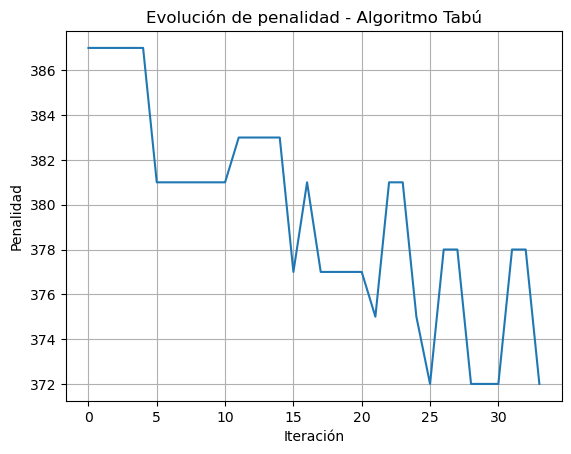

In [3831]:
import matplotlib.pyplot as plt

plt.plot(historial_penalidades)
plt.xlabel("Iteración")
plt.ylabel("Penalidad")
plt.title("Evolución de penalidad - Algoritmo Tabú")
plt.grid(True)
plt.show()


In [3832]:
historial_penalidades

[387,
 387,
 387,
 387,
 387,
 381,
 381,
 381,
 381,
 381,
 381,
 383,
 383,
 383,
 383,
 377,
 381,
 377,
 377,
 377,
 377,
 375,
 381,
 381,
 375,
 372,
 378,
 378,
 372,
 372,
 372,
 378,
 378,
 372]

In [3836]:
type(mejor_individuo)

__main__.Individuo

In [3837]:
penalidad_final,detalles_penalidad_final,penalidad_por_constrain_final = calcular_fitness(mejor_individuo)

In [3838]:
detalles_penalidad_final

[('Cursos del mismo ciclo no deben compartir franja',
  4,
  6,
  24,
  ['Solapamiento en ciclo 8: 202W0801-Sec1 y 202W0804-Sec1 el MIÉRCOLES entre 18:00-22:00 y 17:00-21:00',
   'Solapamiento en ciclo 9: 202W0901-Sec1 y 202W0905-Sec1 el MIÉRCOLES entre 19:00-22:00 y 17:00-21:00',
   'Solapamiento en ciclo 9: 202W0902-Sec1 y 202W0905-Sec2 el LUNES entre 18:00-22:00 y 18:00-22:00',
   'Solapamiento en ciclo 9: 202W0903-Sec2 y 202W0908-Sec2 el SÁBADO entre 09:00-13:00 y 08:00-12:00']),
 ('Cursos deben cumplir totalidad de horas', 0, 6, 0, []),
 ('Cursos deben estar entre 8am-1pm y 2pm-10pm', 0, 6, 0, []),
 ('Docente dicta máximo 4 cursos', 0, 5, 0, []),
 ('Cantidad mínima de docentes por curso',
  6,
  5,
  30,
  ['202W0702 tiene 1 docentes, requiere mínimo 2',
   '202W0705 tiene 1 docentes, requiere mínimo 2',
   '202W0706 tiene 1 docentes, requiere mínimo 2',
   '202W0707 tiene 1 docentes, requiere mínimo 2',
   '202W0904 tiene 1 docentes, requiere mínimo 2',
   '202W0907 tiene 1 docen